Лабораторная работа №6. 

Применение сверточных нейронных сетей (многоклассовая классификация)

Данные: Набор данных для распознавания языка жестов, который состоит из изображений размерности 28x28 в оттенках серого (значение пикселя от 0 до 255). Каждое из изображений обозначает букву латинского алфавита, обозначенную с помощью жеста, как показано на рисунке ниже (рисунок цветной, а изображения в наборе данных в оттенках серого). Обучающая выборка включает в себя 27,455 изображений, а контрольная выборка содержит 7172 изображения. Данные в виде csv-файлов можно скачать на сайте Kaggle -> https://www.kaggle.com/datamunge/sign-language-mnist

Задание 1.
Загрузите данные. Разделите исходный набор данных на обучающую и валидационную выборки.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
mkdir 6_signs

In [0]:
cd 6_signs

/content/6_signs


In [0]:
IMG_WIDTH=28
IMG_HEIGHT=28
IMG_SIZE=(IMG_HEIGHT, IMG_WIDTH)
EPOCH_COUNT=15

In [0]:
import pandas as pd

csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/6_lab/sign_mnist_train.csv')
test_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/6_lab/sign_mnist_test.csv')
print(csv.columns)
print(test_csv.columns)
csv.shape, test_csv.shape

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


((27455, 785), (7172, 785))

In [0]:
print(csv['label'].unique())
print(len(csv['label'].unique()))

[ 3  6  2 13 16  8 22 18 10 20 17 19 21 23 24  1 12 11 15  4  0  5  7 14]
24


In [0]:
from sklearn.model_selection import train_test_split

y = csv['label'].values
test_y = test_csv['label'].values

X = csv.drop(columns='label').values.reshape(-1, *(IMG_SIZE), 1)
test_X = test_csv.drop(columns='label').values.reshape(-1, *(IMG_SIZE), 1)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)

(21964, 28, 28, 1) (21964,)
(5491, 28, 28, 1) (5491,)


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size=64

def create_generator(X, y, batch_size=batch_size):
    img_generator = ImageDataGenerator(rescale=1./255)
    return img_generator.flow(x=X, y=y, batch_size=batch_size)

In [0]:
train_generator = create_generator(train_X, train_y)
val_generator = create_generator(val_X, val_y)
test_generator = create_generator(test_X, test_y)

In [0]:
import matplotlib.pyplot as plt

for n in range(9):
    X, y = next(iter(train_generator))
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(X[0, :, :, 0], cmap='gray')
    plt.title(y[0])
plt.tight_layout()
plt.axis('off')
plt.show()

Задание 2.
Реализуйте глубокую нейронную сеть со сверточными слоями. Какое качество классификации получено? Какая архитектура сети была использована?

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout, Flatten

def get_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(*(IMG_SIZE), 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='sigmoid')) # [0; 25)
    
    return model

In [0]:
get_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [0]:
def plot_accuracy_and_loss(fit_hist):
    epoch_count = len(fit_hist.history['accuracy'])
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Loss')
    ax1.legend(['train', 'val'])

    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('Accuracy')
    ax2.legend(['train', 'val'])
    plt.show()

Epoch 1/15
344/343 [==============================] - 5s 13ms/step - loss: 2.2403 - accuracy: 0.3668 - val_loss: 3.1417 - val_accuracy: 0.0783
Epoch 2/15
344/343 [==============================] - 4s 11ms/step - loss: 0.7910 - accuracy: 0.7352 - val_loss: 0.4608 - val_accuracy: 0.8623
Epoch 3/15
344/343 [==============================] - 4s 11ms/step - loss: 0.2475 - accuracy: 0.9221 - val_loss: 0.1088 - val_accuracy: 0.9683
Epoch 4/15
344/343 [==============================] - 4s 12ms/step - loss: 0.1161 - accuracy: 0.9630 - val_loss: 0.0054 - val_accuracy: 0.9993
Epoch 5/15
344/343 [==============================] - 4s 11ms/step - loss: 0.0711 - accuracy: 0.9785 - val_loss: 0.1106 - val_accuracy: 0.9729
Epoch 6/15
344/343 [==============================] - 4s 11ms/step - loss: 0.0539 - accuracy: 0.9835 - val_loss: 0.0090 - val_accuracy: 0.9989
Epoch 7/15
344/343 [==============================] - 4s 11ms/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.0045 - val_accuracy: 0.9989

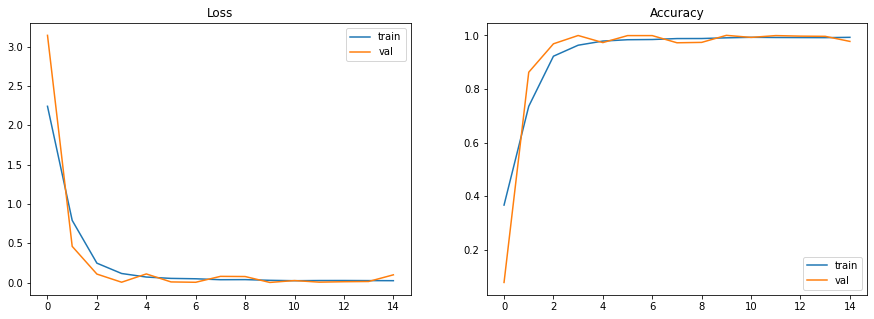

113/112 [==============================] - 1s 5ms/step - loss: 0.3859 - accuracy: 0.9010


[0.38586339354515076, 0.901003897190094]

In [0]:
model = get_model()
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)  
history = model.fit(
    train_generator,
    epochs=EPOCH_COUNT,
    validation_data=val_generator,
    steps_per_epoch=len(train_X) / batch_size, 
    validation_steps=len(val_X) / batch_size)

plot_accuracy_and_loss(history)
model.evaluate(iter(test_generator), steps=len(test_X) / batch_size)

Задание 3.
Примените дополнение данных (data augmentation). Как это повлияло на качество классификатора? 

In [0]:
def create_aug_generator(X, y, batch_size=batch_size):
    img_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      horizontal_flip=True,
      brightness_range=[0.75, 1.25])
    return img_generator.flow(x=X, y=y, batch_size=batch_size)
    

In [0]:
train_aug_generator = create_aug_generator(train_X, train_y)

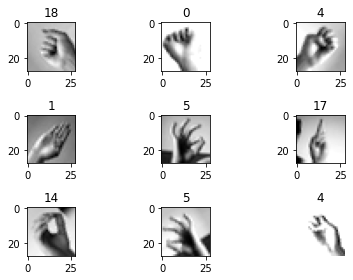

In [0]:
for n in range(9):
    X, y = next(iter(train_aug_generator))
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(X[0, :, :, 0], cmap='gray')
    plt.title(y[0])
plt.tight_layout()
plt.axis('off')
plt.show()

Epoch 1/15
344/343 [==============================] - 13s 37ms/step - loss: 2.7107 - accuracy: 0.1908 - val_loss: 3.2835 - val_accuracy: 0.1193
Epoch 2/15
344/343 [==============================] - 13s 37ms/step - loss: 2.0772 - accuracy: 0.3269 - val_loss: 1.4432 - val_accuracy: 0.5014
Epoch 3/15
344/343 [==============================] - 13s 37ms/step - loss: 1.4244 - accuracy: 0.5201 - val_loss: 0.7025 - val_accuracy: 0.7727
Epoch 4/15
344/343 [==============================] - 13s 36ms/step - loss: 1.0442 - accuracy: 0.6485 - val_loss: 0.5862 - val_accuracy: 0.7958
Epoch 5/15
344/343 [==============================] - 13s 37ms/step - loss: 0.8443 - accuracy: 0.7137 - val_loss: 0.6184 - val_accuracy: 0.7785
Epoch 6/15
344/343 [==============================] - 13s 37ms/step - loss: 0.7105 - accuracy: 0.7556 - val_loss: 0.3636 - val_accuracy: 0.8685
Epoch 7/15
344/343 [==============================] - 13s 37ms/step - loss: 0.6221 - accuracy: 0.7887 - val_loss: 0.6369 - val_accuracy:

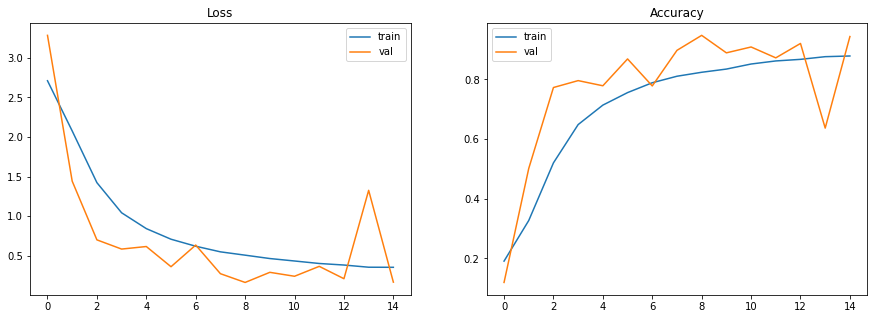

113/112 [==============================] - 1s 5ms/step - loss: 0.3845 - accuracy: 0.8759


[0.3844611942768097, 0.8759062886238098]

In [0]:
model = get_model()
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)  
history = model.fit(
    train_aug_generator,
    epochs=EPOCH_COUNT,
    validation_data=val_generator,
    steps_per_epoch=len(train_X) / batch_size, 
    validation_steps=len(val_X) / batch_size)

plot_accuracy_and_loss(history)
model.evaluate(iter(test_generator), steps=len(test_X) / batch_size)

The accuracy of the model has decreased from 90.1% to 87.6%. I can't say that the model is being overfitted. Probably, to increase the accuracy, we need to run more epoches.


Задание 4.
Поэкспериментируйте с готовыми нейронными сетями (например, AlexNet, VGG16, Inception и т.п.), применив передаточное обучение. Как это повлияло на качество классификатора? Можно ли было обойтись без него?
Какой максимальный результат удалось получить на контрольной выборке?

In [0]:
from tensorflow.keras.applications import VGG16

# require >= 32x32
VGG_IMG_SIZE = (IMG_HEIGHT * 2, IMG_WIDTH * 2)

vgg16_model = VGG16(input_shape=(*(VGG_IMG_SIZE), 3), include_top=False)
vgg16_model.trainable = False
vgg16_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 56, 56, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584    
______________________________________________________________

In [0]:
def get_pretrained_model():
    model = Sequential()
    for layer in vgg16_model.layers:
        model.add(layer)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='sigmoid'))

    return model

In [0]:
get_pretrained_model().summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 14, 14, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 14, 14, 256)      

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

def create_tl_generator(X, y, batch_size=batch_size, aug=False):
    if aug:
        img_generator = ImageDataGenerator(
          rescale=1./255,
          rotation_range=45,
          horizontal_flip=True,
          brightness_range=[0.75, 1.25])
    else:
      img_generator = ImageDataGenerator(rescale=1./255)

    return img_generator.flow(
        x=tf.image.grayscale_to_rgb(tf.image.resize(X, VGG_IMG_SIZE)), 
        y=y,
        batch_size=batch_size)

In [0]:
train_tl_generator = create_tl_generator(train_X, train_y)
val_tl_generator = create_tl_generator(val_X, val_y)
test_tl_generator = create_tl_generator(test_X, test_y)

In [0]:
X, _ = next(iter(train_tl_generator))
X.shape

(64, 56, 56, 3)

Epoch 1/15
344/343 [==============================] - 22s 65ms/step - loss: 1.0560 - accuracy: 0.7624 - val_loss: 0.3640 - val_accuracy: 0.9619
Epoch 2/15
344/343 [==============================] - 22s 64ms/step - loss: 0.0989 - accuracy: 0.9791 - val_loss: 0.0895 - val_accuracy: 0.9751
Epoch 3/15
344/343 [==============================] - 22s 64ms/step - loss: 0.0528 - accuracy: 0.9897 - val_loss: 0.0358 - val_accuracy: 0.9913
Epoch 4/15
344/343 [==============================] - 22s 65ms/step - loss: 0.0406 - accuracy: 0.9922 - val_loss: 0.0486 - val_accuracy: 0.9862
Epoch 5/15
344/343 [==============================] - 22s 65ms/step - loss: 0.0346 - accuracy: 0.9923 - val_loss: 0.0180 - val_accuracy: 0.9958
Epoch 6/15
344/343 [==============================] - 22s 65ms/step - loss: 0.0289 - accuracy: 0.9934 - val_loss: 0.0320 - val_accuracy: 0.9891
Epoch 7/15
344/343 [==============================] - 22s 65ms/step - loss: 0.0279 - accuracy: 0.9934 - val_loss: 0.0165 - val_accuracy:

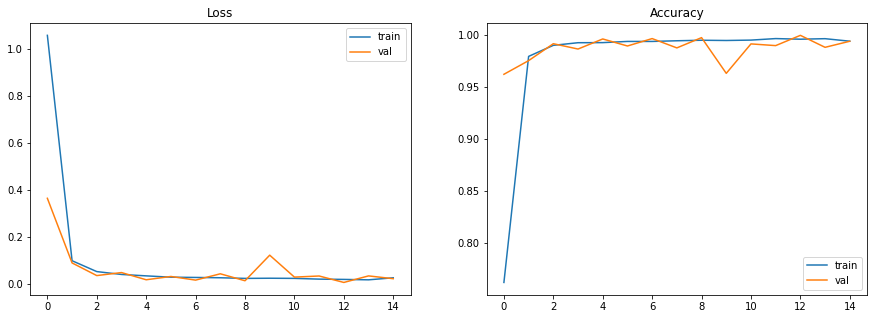

113/112 [==============================] - 6s 52ms/step - loss: 0.2632 - accuracy: 0.9303


[0.26320362091064453, 0.9302844405174255]

In [0]:
#without augmentation
pretrained_model = get_pretrained_model()
pretrained_model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)  
history = pretrained_model.fit_generator(
    train_tl_generator,
    epochs=EPOCH_COUNT,
    validation_data=val_tl_generator,
    steps_per_epoch=len(train_X) / batch_size, 
    validation_steps=len(val_X) / batch_size)

plot_accuracy_and_loss(history)
pretrained_model.evaluate(iter(test_tl_generator), steps=len(test_X) / batch_size)

In [0]:
train_tl_aug_generator = create_tl_generator(train_X, train_y, aug=True)

Epoch 1/15
344/343 [==============================] - 42s 121ms/step - loss: 1.5328 - accuracy: 0.5813 - val_loss: 1.0498 - val_accuracy: 0.6833
Epoch 2/15
344/343 [==============================] - 40s 116ms/step - loss: 0.6415 - accuracy: 0.7862 - val_loss: 0.4723 - val_accuracy: 0.8423
Epoch 3/15
344/343 [==============================] - 40s 116ms/step - loss: 0.5121 - accuracy: 0.8312 - val_loss: 0.4222 - val_accuracy: 0.8463
Epoch 4/15
344/343 [==============================] - 40s 116ms/step - loss: 0.4696 - accuracy: 0.8419 - val_loss: 0.3338 - val_accuracy: 0.8902
Epoch 5/15
344/343 [==============================] - 40s 116ms/step - loss: 0.4383 - accuracy: 0.8533 - val_loss: 0.3349 - val_accuracy: 0.8913
Epoch 6/15
344/343 [==============================] - 40s 117ms/step - loss: 0.4170 - accuracy: 0.8613 - val_loss: 0.4525 - val_accuracy: 0.8348
Epoch 7/15
344/343 [==============================] - 40s 115ms/step - loss: 0.4029 - accuracy: 0.8640 - val_loss: 0.4193 - val_ac

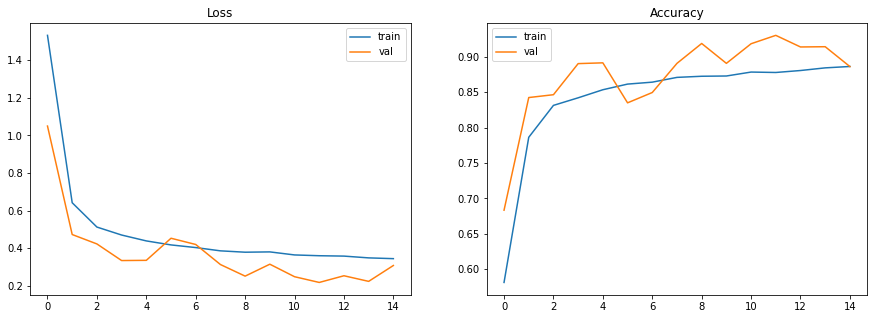

113/112 [==============================] - 6s 51ms/step - loss: 0.5077 - accuracy: 0.8278


[0.5076965689659119, 0.8278025388717651]

In [0]:
#with augmentation
pretrained_model = get_pretrained_model()
pretrained_model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)  
history = pretrained_model.fit_generator(
    train_tl_aug_generator,
    epochs=EPOCH_COUNT,
    validation_data=val_tl_generator,
    steps_per_epoch=len(train_X) / batch_size, 
    validation_steps=len(val_X) / batch_size)

plot_accuracy_and_loss(history)
pretrained_model.evaluate(iter(test_tl_generator), steps=len(test_X) / batch_size)

The accuracy without augmentation is 93% - the best result I've got; 
using augmentation - 82.78%, but I am positive that if we're going on fitting the model, the accuracy will be higher.